In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\NLP-Sentiment\sentimentSet.csv")

In [3]:
data.head()

,sentiment,tweets
0,-1,eşim tsk deniz kuvvetleri personeliyaklaşık 1 ...
1,-1,pandemi+ramazan denk gelince keyfim kaçık oldu...
2,-1,kimsenin sorgulama endişesi gününü kurtardığın...
3,-1,bağışıklık güçlendirmek mesala stokin fırtınas...
4,-1,zaman vietnam kore dünya ülkelerinin ülke ehli...


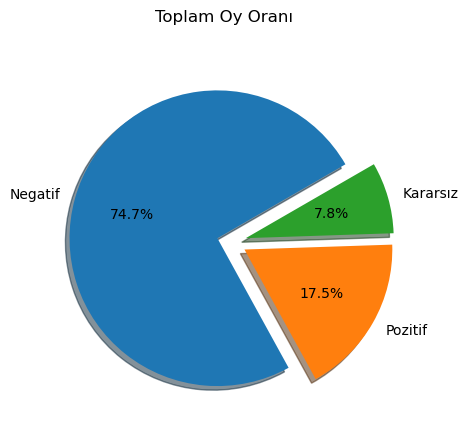

sentiment
-1    2066
 1     485
 0     216
Name: count, dtype: int64

In [4]:
grup=data["sentiment"].value_counts()
fig, ax = plt.subplots()
fig.suptitle("Toplam Oy Oranı")
ax.pie(grup, explode=(0.1,0.1,0.1), labels=["Negatif","Pozitif","Kararsız"], autopct='%1.1f%%', shadow=True, startangle=30)
plt.show()
grup

In [5]:
import re
import nltk
nltk.download("stopwords")

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
tweets=[]
for i in range(len(data)):
    tweet=re.sub("[^a-zA-ZİıöÖÜüşŞçÇğĞ]"," ",data["tweets"][i])
    tweet=tweet.lower()
    tweet=tweet.split()
    tweet=[ps.stem(kelime) for kelime in tweet if not kelime in set(stopwords.words('turkish'))]
    tweet=' '.join(tweet)
    tweets.append(tweet)

In [7]:
tweets[1]

'pandemi ramazan denk gelinc keyfim kaçık olduğundan kilo vermiştim der falan istemesek oturunca yağlanıyoruz'

In [8]:
data["tweets"][1]

'pandemi+ramazan denk gelince keyfim kaçık olduğundan kilo vermiştim ders falan istemesek oturunca yağlanıyoruz'

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)
X=cv.fit_transform(tweets).toarray()
y=data.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc)

[[374   7  31]
 [ 27   7  10]
 [ 52  11  35]]
0.7509025270758123


In [14]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc)

[[392   0  20]
 [ 40   0   4]
 [ 47   0  51]]
0.7996389891696751
